`Introduction`, `Chapter 1`, `Chapter 2`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mixing Imagination and Reality with Style Transfer
## Can ResNet or other networks be used for seeing through the lens of the past?

### Imported packages

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
from PIL import Image

In [5]:
import IPython.display
import time
import functools
import os

In [6]:
from skimage.io import imread, imshow
from skimage.transform import resize

In [7]:
import tensorflow as tf

In [8]:
from tensorflow.keras.preprocessing import image as kp_image
from tensorflow.keras import models
from tensorflow.keras import losses
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.applications import vgg19

In [9]:
mpl.rcParams["figure.figsize"] = (10, 10)
mpl.rcParams["axes.grid"] = False

## Abstract

Style Transfer is a technique that extracts content from one image, and style - from another, to mix them together in a third image. Scientists tried to extract texture long time ago. Only in 2016 Gatys and his colleagues found an algorithm that generates images by taking content from one picture, and style - from another. It still enjoys much research interest. 

One of the puzzles surrounding Style Transfer is why it happens only with VGG19 - a Deep Convolutional Neural Network trained on million ImageNet examples; what is so special about VGG19, and what its neurons know about style and content. Scientists tried to extract content and style representations from other architectures such as ResNet and Inception, which outperformed VGG on subsequent image classification challenges, but of no avail. An image generated by Leo Barbosa with content and style features extracted with ResNet50 only to a certain extent resembled the ones synthesised with VGG19.

This paper, one the one hand, also tried to find ResNet50 layers that learn and store content and style representations, and to transfer them to a newly generated image. On the other hand, an attempt was made to train a network, much shallower than VGG19, on a much smaller dataset. It was believed that net's depth is important factor but its layers and neurons, among other things, obtain knowledge not only about content but about style as well. However, results of both tasks showed that there is something special in VGG19, which eventually deserves more research.

*Keywords*: Style Transfer, Deep Learning, Convolutional Neural Networks, VGG19, ResNet50

## Table of Contents

No | CHAPTER / SUB-CHAPTER | No | CHAPTER / SUB-CHAPTER
:- |:- |:- |:-
  | **Introduction** |  | 
 **1** | **Previous research** | **4** | **Implement Style Transfer with a shallower network** 
   |    |  | 
 **2** | **Description and Implementation of Neural Style Transfer with VGG19** | 4.1 | Load and prepare dataset
 2.1 | A brief description of Neural Style Transfer | 4.1.1 | Load Caltech256 dataset
 2.2 | Get a pair of input images | 4.1.2 | Split data into train, validation, and test sets 
 2.3 | Visualize input images | 4.1.3 | Split attributes and labels 
 2.4 | Prepare images | 4.1.4 | Display some images 
 2.5 | Define content and style representation, and build the model | 4.1.5 | Resize images 
 2.5.1 | The VGG architecture | 4.1.6 | Pre-process images 
 2.5.2 | Define Content and Style Representation |  |  
 2.5.3 | Build the Style Transfer Model | 4.2 |  Build, compile and fit a shallower CNN 
 2.6 | Define and create loss functions | 4.2.1 | Prepare constants and variables 
 2.6.1 | Define and create Content loss (content representation) | 4.2.2 | Build the CNN architecture (model) 
 2.6.2 | Define and create Style loss (style representation) | 4.2.3 | Explore untrained CNN architecture (model)
 2.6.3 | Define and create Loss for Style Transfer | 4.2.4 | Compile the CNN 
 2.7 | Apply style transfer | 4.2.5 | Train the CNN
 2.7.1 | Get Content and Style representations | 4.2.6 | Explore model after training
 2.7.2 | Compute Loss and Gradients | 4.2.7 | Evaluate and save model 
 2.7.3 | Optimization Loop |   |    
 2.7.4 | Run Style Transfer to the selected pair of images | 4.3 | Use Shallow Model for Style Transfer
 2.8 | Visualize Style Transfer outputs | 4.3.1 | Adjust Style Transfer functions 
 2.9 | Style Transfer with VGG19 for other pairs of images | 4.3.2 | Run Style Transfer with shallower net 
   |   |   |   
 **3** | **Style Transfer with ResNet implementation** |  **5** | **Compare results**
 3.1 | ResNet Architecture |  |  
 3.2 | Define Content and Style Representation [ResNet] | **6** | **Conclusion and Remarks** 
 3.3 | Brief inventory of previous work |  | 
 3.4 | Define new variables and functions |   |  References  
 3.5 | Run Style Transfer on ResNet50 |   |   
 3.6 | Visualize Style Transfer on ResNet50 |   |    

## Introduction

It wasn't until the mid XIX century that the [photographic camera was invented](https://en.wikipedia.org/wiki/History_of_the_camera). Making a picture today is a matter of touching the right icon on the smartphone, or clicking a button on a professional camera. The scenery is instantly there: one can "see" the previous moment in a second. He can store it, show it, spread it, reproduce it, delete it (temporary or forever), or do whatever he wants with this image. On the other hand, computer programs such as Photoshop (by amending photographs) allow us to peek into the future, or at least to shape our ideas about it.

Two hundred years ago this was impossible. People lived in the present, kept the past in their minds, and imagined the future. There were only a tiny number of talented people who could draw and show the others what they saw or dreamed of. Some of them became quite famous (e.g. Leonardo Da Vinci (1452-1519), Michelangelo (1475-1564), Rembrandt (1606-1669), Van Gogh (1853-1890), Claude Monet (1840-1926), Gustav Klimt (1862-1918), Pablo Picasso (1881-1973), Salvador Dali (1904-1989), etc.), and their paintings adorn the walls of the greatest museums (e.g. National Gallery (London), Rijksmuseum (Amsterdam), Louvre (Paris), Prado (Madrid)) and private collections. As a whole, each artist has its own style, which cannot be mistaken; it is subject of research, and is taught at Art Academies. For example, for Claude Monet "brush stroke is a key feature of his works. The technique, honed throughout his career relies on fast brush strokes in order to depict light in never before seen Realism"[1].  Artists draw inspiration from things like hope, fears, love, sadness, godliness, wars, as we do also today, but instead of capturing them on a canvas, we store our vision in computer memory.

Image style was subject of research not only in Arts but in Mathematics, too. Four years ago (in 2016), a seminal paper on computer vision proved that Neural Networks can separate image style from content and both could be used independently (e.g. for generating another image). This "invention" quickly became quite popular. Combining a style from one image with content from another is really mesmerizing, especially if one gets the style of a famous artist. Thus, a deep learning algorithm could show us how Rembrandt would have seen the times we live in. In other words, one could think of Neural Style Transfer as mixing imagination (from the past) with reality (of today). This is somewhat speculative but still rather appealing.

Literature review shows that VGG (a type of Deep Neural Network) is the preferable algorithm by the authors of Neural Style Transfer (this is the official term used for combining style and content from different images) and by other deep learning engineers. A brief research revealed that other algorithms (e.g. ResNet, Inception) do not produce so nice combinations. Hence, it is argued that there is something special in VGG convolutional layers. 

The **task** of this paper is twofold. First, it is to present the Neural Style Transfer algorithm and all its features (implemented with VGG). Second, it is to test if Style Transfer is possible with another existing convolutional net and with smaller than VGG one. The **hypothesis** here, taking into account existing research so far, is that there are not reasons to reject it. The opposite would mean that there is something special in VGG architecture, which makes it the only appropriate one for Style Transfer.

The work is organised as follows: Chapter No. 1 goes over relevant research; the Style Transfer algorithm with VGG19 is described and implemented afterwards (in Chapter No. 2). Similar implementation, with ResNet, is attempted and described in Chapter No. 3. Much shallower model is trained in Chapter No. 4. Its layers are used in an attempt to transfer content and style. Results are compared in Chapter No. 5. Conclusions and final remarks could be found in Chapter No. 6. The reference list is at the end of the paper. 

## 1. Previous research

*Texture transfer*: Initially, prior to Neural Networks (NN), research was focused on texture transfer. According to Gatys et. al.[2] - authors of the Neural Style Transfer algorithm, the goal of texture transfer is "to synthesise a texture from a source image while constraining the texture synthesis in order to preserve the semantic content of a target image". They point out that there are "a large range of powerful non-parametric algorithms that can synthesise photorealistic natural textures by resampling the pixels of a given source texture", which could be used for texture synthesis, and refer to works such as *"Texture synthesis by nonparametric sampling"*[3] and *"Graphcut textures: image and video synthesis using graph cuts"*[4].


*Neural Style transfer (in general)*: As mentioned above, Gatys et. al. invented the Neural Style Transfer Algorithm. It's description was officially published in 2016 in an article titled *"Image Style Transfer Using Convolutional Neural Networks"* in "Conference on Computer Vision and Pattern Recognition (CVPR)" periodical. A year earlier, however, they described it in another publication -  "A Neural Algorithm of Artistic Style"[5], available in www.arxiv.org. In late 2016, Vincent Dumoulin, Jonathon Shlens and Manjunath Kudlur from Google Brain investigated the construction of a single, scalable deep network that can parsimoniously capture the artistic style of a diversity of paintings[6]. They found that "a new painting style may be transmitted to and stored on a mobile device with a small number of parameters". Furthermore, Neural Style Transfer is a popular topic of research among deep learning community. Various implementations are published in ["Papers with code"](https://paperswithcode.com/search?q_meta=&q=Neural+Style+Transfer), where many networks still rely on the VGG architecture (more on VGG follows below).


*Neural Style transfer (with ResNet and Inception)*: Less popular are Style Transfers using other nets. In 2017, Sahil Singla examined if transfer can work with Inception*. At the very beginning of his paper[7], he reminds that Style Transfer requires "well-developed hierarchy of features for calculating the loss" and argues that Inception architectures (unlike Resnet**) have the same property. By performing several experiments with tweaking architecture's elements, he found that "initialization makes a big difference" if one wants to generate good images with Inception-v2.

A year later, a Google team also explored if Style Transfer is possible with non-VGG architecture[8]. The authors point out to existing hypothesis about VGG popularity: the first is that "VGG’s large size causes it to capture information that other models discard. This extra information [...] isn’t helpful for classification, but it does cause the model to work better for style transfer". And the second assumes the "other models downsample more aggressively than VGG, losing spatial information". Google's team, instead of parameterizing optimized image in terms of pixels (which are highly correlated with their neighbors), used a scaled Fourier transform. Thus, they found that "parameterizing the learned image in a decorrelated space makes style transfer more robust to choice of model".

And finally, Leo Barbosa*** tried Style Transfer with pre-trained ResNet50[9]. He chose it since it proved to be great for image classification. Barbosa is of the opinion that "due to the complexity of ResNet50, the feature maps do not work as well as those of VGG16 or VGG19". Furthermore, he argued that getting a better generated image, "trial and error using different combinations for content and style layers as well as hyperparameters (learning rate, content weight, and style weight) is needed". Therefore, his conclusion is "that Neural Style Transfer is very much an art rather than a science".

$\mbox{*}$ Inception: Inception is a NN architecture with stacked convolution layers, inception modules and pooling layers. Inception modules are composed of filters sized 1x1, 3x3 and 5x5, combined with their output filter, concatenated into a single output vector forming the input of the next stage[10].

$\mbox{**}$ ResNet: ResNet (abbreviation of Residual Network) is a simple deep CNN with a shortcut (skip)
connection added to each pair of convolutional layers[11].

$\mbox{***}$ Note: Leo Barbosa used the same Neural Style Transfer tutorial and code as these used in this paper.

## 2. Description and Implementation of Neural Style Transfer with VGG19

This Chapter describes and implements of Neural Style Transfer with VGG-19. The latter, as well as its elements, are explained below. The code executing Style Transfer is replicated (with minor amendments) from a TensorFlow tutorial in Medium[12], although other implementations are available, too (e.g. the one provided by [Keras](https://keras.io/examples/generative/neural_style_transfer/)). Code lines are organized in functions. Each function, including its arguments, what it does and what it returns, are also explained. Important terminology is outlined with **indented paragraphs**, thus the reader could skip them if feels these explanations unnecessary.

### 2.1. A brief description of Neural Style Transfer

Gatys et al.[2] recognise that separating "content from style in natural images is still an extremely difficult problem". Nonetheless, recent advance of Deep Convolutional Neural Networks "produced powerful computer vision systems that learn to extract high-level semantic information from natural images". In 2016, they introduced **A Neural Algorithm of Artistic Style** - a new algorithm to perform image Style Transfer. This method is reduced to an optimization problem within a single neural network. Thus, it should be stressed here, that Neural Style Transfer **does not require training a model**; rather images are generated by performing a pre-image search for matching feature representations of example images. The latter means that designing a NN architecture (e.g. layers, filters, padding, activation functions, etc.), compiling and fitting the network, is not a prerequisite for Style Transfer. Instead, representations of an already trained model are extracted and used. 

Perhaps the most important element here is the Loss function. In practice, it is an expression of all computations’ goal, the desired outcome. Style Transfer’s success is measured by three Loss functions: $L_{content}$, $L_{style}$, and $L_{total}$. These are further explained below. 

Two input images are necessary for transferring style: one for providing content, and another - for the style. Both are fed forward through the network. The algorithm learns their representations (outputs from feature maps). It is believed that content representations are captured by the last convolutional layers, whereas style are carried throughout the whole net. 

At the same time, the algorithm generates a third image (also known as noisy image or 'initial image', as referred in the code below). Usually, it is initialised with random values (or take content for its basis), which are being updated against input images until its content resembles the first picture and its style - the second one. Computing gradients and updating layer weight matrices during backward propagation (at several iterations) are responsible for minimizing Loss functions, and for synthesising the new image. This complex process is illustrated in Figure 1.

**Figure 1. Illustration of Neural Style Transfer**

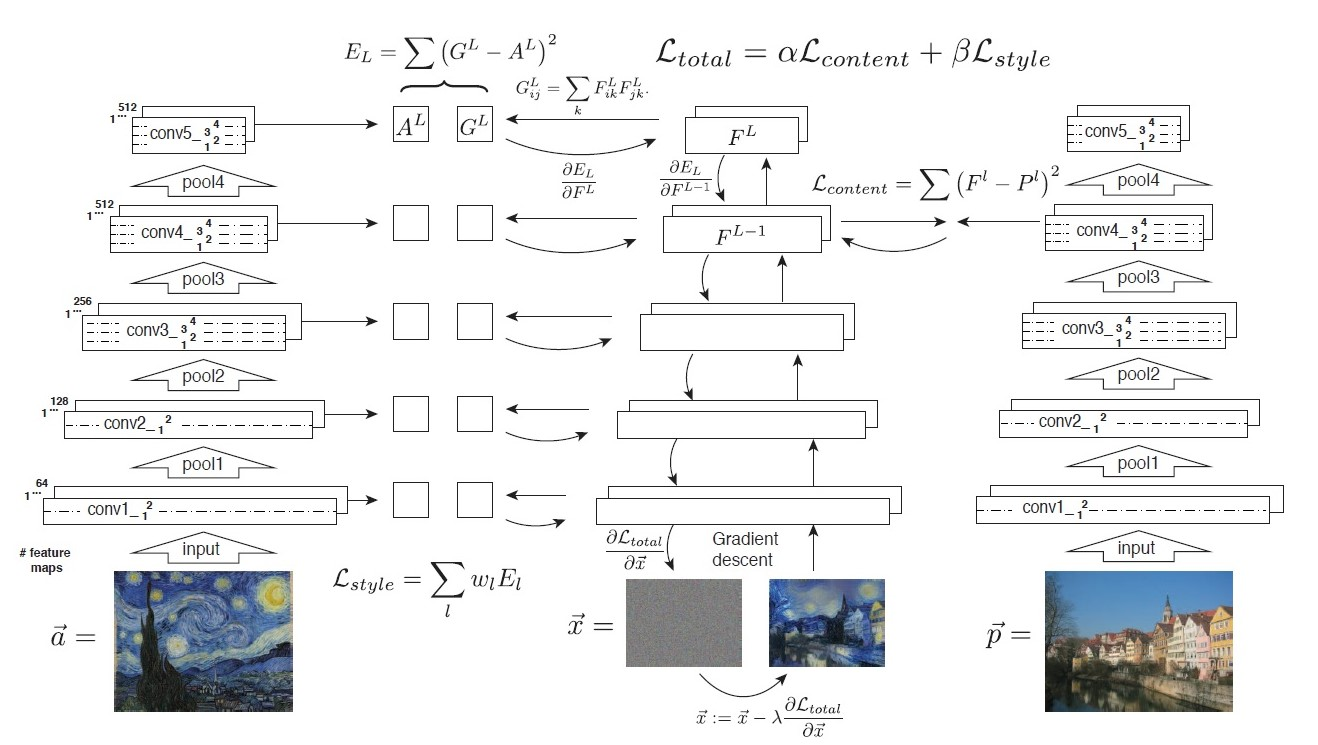

Source: L. A. Gatys, A. S. Ecker and M. Bethge, "*Image Style Transfer Using Convolutional Neural Networks*"

Gatys et al.[2] explain Style Transfer as follows: first content and style features are extracted and stored. The style image $\vec{a}$ is passed through the network and its style representation $A^l$ on all layers included are computed and stored (left). The content image $\vec{p}$ is passed through the network and the content representation $P^l$ in one layer is stored (right). Then a random white noise image $\vec{x}$ is passed through the network and its style features $G^l$ and content features $F^l$ are computed. On each layer included in the style representation, the element-wise mean squared difference between $G^l$ and $A^l$ is computed to give the style loss $L_{style}$ (left). Also, the mean squared difference between $F^l$ and $P^l$ is computed to give the content loss $L_{content}$ (right). The total loss $L_{total}$ is then a linear combination between the $L_{content}$ and $L_{style}$. Its derivative with respect to the pixel values can be computed using error back-propagation (middle). This gradient is used to iteratively update the image $\vec{x}$ until it simultaneously matches the style features of the style image $\vec{a}$ and the content features of the content image $\vec{p}$ (middle, bottom).

The whole process, step by step, is implemented in Chapter 2.

### 2.2. Get a pair of input images

The first step is to check if TensorFlow's `Eager Execution` is enabled. It was introduced in 2018. As explained by [Google AI](https://ai.googleblog.com/2017/10/eager-execution-imperative-define-by.html), Eager Execution "is an imperative, define-by-run interface where operations are executed immediately as they are called from Python. This makes it easier to get started with TensorFlow, and can make research and development more intuitive." The code returns "True", which confirms `Eager Execution` is switched-on.

The second step is to **choose content and style images**. A view of [Manhattan, New York](https://www.gettyimages.com/detail/photo/lower-manhattan-cityscape-chinatown-royalty-free-image/1055874276?adppopup=true) will provide information for the former, and ["Abduction of Europa" by Rembrandt](https://content3.cdnprado.net/imagenes/Documentos/imgsem/65/65c6/65c6223f-71f5-4ca6-9ea1-a8129db7c323/0e3b4df5-8130-b812-2746-36b8ddde1871.jpg) - for the latter.

Thereafter, the **paths** to content and style images, respectively, are defined. They are stored as global variables because will not be changed until the end of the paper.

*Note*: If the reader wants to run the algorithm on own machine, paths should be updated accordingly.

In [10]:
tf.executing_eagerly()
print("Eager Execution: {}".format(tf.executing_eagerly()))

Eager Execution: True


In [12]:
CONTENT_PATH = "/content/drive/MyDrive/DL Project/1_New_York.jpg"
# C:/Users/aneta/OneDrive/Documents/07_Deep_learning/10_Project/pictures/1_New_York.jpg
STYLE_PATH = "/content/drive/MyDrive/DL Project/1_rembrandt.jpg"
# C:/Users/aneta/OneDrive/Documents/07_Deep_learning/10_Project/pictures/1_rembrandt.jpg

### 2.3. Visualize input images

Images could be visualized with three lines of code. However, if Style Transfer with another pair of images is to be performed, too, these code lines must be repeated once, twice or more times, which is not a good practice. For this reason, image visualization code is stored in functions. 

`load_img` loads the image. Content picture is 2048 pixels wide and 1536 pixels high and style image – 720 x 563, respectively. Since images usually come with different dimensions, they are being resized to make them compatible with the Input requirements of the chosen algorithm.

The very first step is to set the maximum length or height of an image. In this case, `max_dim` is set to 512. An image is opened with PIL's function `Image.open()`. It receives the path to the image. The long side (`long`), i.e. picture's width, is the largest value in its size (i.e. 2048). It is rescaled by 25% (`scale`), i.e. the ratio between the maximum dimension (512) and its width (2048). These values are used in the `resized()` function, which receives image's width and height multiplied by the scaling factor. These values are rounded. In addition, `ANTIALIAS` is applied. The latter is a type of filter for [improving image quality](https://www.howtogeek.com/73704/what-is-anti-aliasing-and-how-does-it-affect-my-photos-and-images/). All computations are stored in `img`. 

Thereafter, pixel values are converted into NumPy array by Keras image preprocessing function `img_to_array()`. Since images will be fed to a CNN, they should be converted into tensors. The latter means that images should be represented as a 4-dimensional matrix. NumPy’s `expand_dims()` helps for adding another axis (in this case at index 0, indicating batch dimension). 

All results are stored in `img`. At the end, the function returns the 4D image.

In [13]:
def load_img(path_to_img):
    """
    Function: Loads an image from a path.
    
    Arguments: Path to the image.
    
    Returns: 4D image (tensor).
    """
    max_dim = 512
    img = Image.open(path_to_img)
    long = max(img.size)
    scale = max_dim/long
    img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), Image.ANTIALIAS)
  
    img = kp_image.img_to_array(img)
  
    # Broadcast the image array so it has a batch dimension 
    img = np.expand_dims(img, axis = 0)
    return img

In [14]:
# Check how image is loaded and transformed
load_img(CONTENT_PATH)

array([[[[123.,  98., 104.],
         [124., 102., 108.],
         [125., 103., 111.],
         ...,
         [151., 188., 214.],
         [153., 188., 216.],
         [152., 187., 215.]],

        [[119.,  94., 100.],
         [121.,  99., 105.],
         [122.,  99., 107.],
         ...,
         [152., 189., 215.],
         [153., 188., 216.],
         [152., 187., 215.]],

        [[116.,  91.,  97.],
         [120.,  95., 101.],
         [119.,  96., 102.],
         ...,
         [153., 189., 215.],
         [152., 189., 216.],
         [152., 189., 216.]],

        ...,

        [[ 17.,  13.,  20.],
         [ 11.,   8.,  15.],
         [  6.,   5.,  11.],
         ...,
         [ 82.,  70.,  79.],
         [ 78.,  70.,  81.],
         [ 77.,  74.,  85.]],

        [[ 15.,  12.,  19.],
         [ 14.,  11.,  19.],
         [ 17.,  14.,  22.],
         ...,
         [ 76.,  50.,  49.],
         [ 51.,  43.,  51.],
         [ 43.,  39.,  47.]],

        [[ 15.,  12.,  19.],
       

The next function (`imshow()`) displays the image. Visualizing data in 4-dimensional (multi-dimensional) space is impossible. For this reason, the first thing to do here is to go one step back and to remove the dimension added above. This is performed with NumPy’s `squeeze()` function, which expects the data in question (`img`) and the axis that is to be removed. `out` stores the result.

It should be noted here that the previous function made all values floating point type, which cannot be displayed by Matplotlib visualizing tools. Therefore, the output is converted into "uint8" data type (by `astype()` method) and stored. The image is displayed by calling `plt.imshow()`.

This function also allows adding a title (`plt.title()`). In general, axes ticks could be removed but, in this case, they are left in order to show images' width and height.

In [15]:
def imshow(img, title=None):
    """
    Function: Displays image.
    
    Arguments: Image and title (optional).
    
    Returns: Visualized image.
    """
    # Remove bacth dimension
    out = np.squeeze(img, axis=0)
    
    # Normalize for display
    out = out.astype('uint8')
    plt.imshow(out)
    
    # Show image title
    if title is not None:
        plt.title(title)
    plt.imshow(out)

Both content and style images are displayed below. Their data are stored in variables - `content` and `style`, respectively.

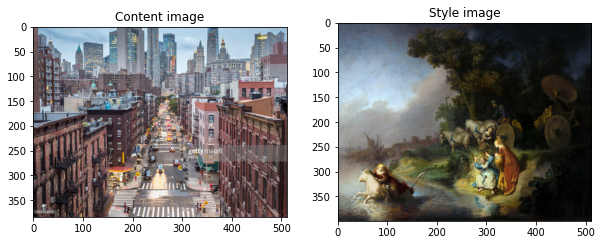

In [16]:
content = load_img(CONTENT_PATH)
style = load_img(STYLE_PATH)

plt.subplot(1, 2, 1)
imshow(content, "Content image")

plt.subplot(1, 2, 2)
imshow(style, "Style image")
plt.show()

### 2.4. Prepare images 

Deep Learning algorithms require data pre-processing in order to work properly (e.g. to compute weights and representations). For example, it is almost compulsory to scale values (for instance, between 0 and 1). Keras provides preprocessing application for all preloaded architectures. Computations above were useful for displaying the images but are not of much help for the algorithm itself.

Therefore, the next step is to load and pre-process images with VGG19 settings. This is performed by calling `vgg19.preprocess_input()` of Keras. It receives the image, as loaded and processed by the first function, and returns it with other pixel values. As explained in TensorFlow documentation, this function converts the images from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.

In [17]:
def load_and_process_img(path_to_img):
    """
    Function: Preprocess image for VGG19 use.
    
    Arguments: Path to the image.
    
    Returns: Image values for VGG19.
    """
    img = load_img(path_to_img)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

In [18]:
# Check how values are pre-processed for VGG19
load_and_process_img(CONTENT_PATH)

array([[[[ 6.0997009e-02, -1.8778999e+01, -6.8000031e-01],
         [ 4.0609970e+00, -1.4778999e+01,  3.1999969e-01],
         [ 7.0609970e+00, -1.3778999e+01,  1.3199997e+00],
         ...,
         [ 1.1006100e+02,  7.1221001e+01,  2.7320000e+01],
         [ 1.1206100e+02,  7.1221001e+01,  2.9320000e+01],
         [ 1.1106100e+02,  7.0221001e+01,  2.8320000e+01]],

        [[-3.9390030e+00, -2.2778999e+01, -4.6800003e+00],
         [ 1.0609970e+00, -1.7778999e+01, -2.6800003e+00],
         [ 3.0609970e+00, -1.7778999e+01, -1.6800003e+00],
         ...,
         [ 1.1106100e+02,  7.2221001e+01,  2.8320000e+01],
         [ 1.1206100e+02,  7.1221001e+01,  2.9320000e+01],
         [ 1.1106100e+02,  7.0221001e+01,  2.8320000e+01]],

        [[-6.9390030e+00, -2.5778999e+01, -7.6800003e+00],
         [-2.9390030e+00, -2.1778999e+01, -3.6800003e+00],
         [-1.9390030e+00, -2.0778999e+01, -4.6800003e+00],
         ...,
         [ 1.1106100e+02,  7.2221001e+01,  2.9320000e+01],
         [

The figures above are quite different from those displayed few cells earlier.

Values should undergo another conversion (after Style Transfer) to display generated image possible. This will be performed by another function - `deprocess_img()`.

It gets a copy of the processed image, which is stored in a temporary variable `x`. The input must be an image of dimensions [1, height, width, channel] or [height, width, channel]. For this reason, the first thing to do is to check picture's size. NumPy’s `squeeze()` method is applied if it is a 4-dimensinal tensor. A quick check is performed as to whether the image has the right size. Provided that it exceeds 3 dimensions, the function returns the following error: "ValueError: 'Invalid input to deprocessing image'".

Thereafter, the function converts the image from BGR to RGB. To that end each color channel receives ImageNet's pixel mean values back.

NumPy’s `clip()` function fixes all values within a given interval (in this case between 0 and 255). Converting them into "uint8" type is important for proper visualization. 

Results of all computations are stored in `x`, which is the outcome of this function.

In [19]:
def deprocess_img(processed_img):
    """
    Function: Converts computed values in RGB format.
    
    Arguments: Processed image.
    
    Returns: Converted image.
    """
    x = processed_img.copy()
    if len(x.shape) == 4:
        x = np.squeeze(x, 0)
    assert len(x.shape) == 3, ()
    if len(x.shape) != 3:
        raise ValueError("Invalid input to deprocessing image")
  
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x

The image below shows how a "deprocessed" image would look like.

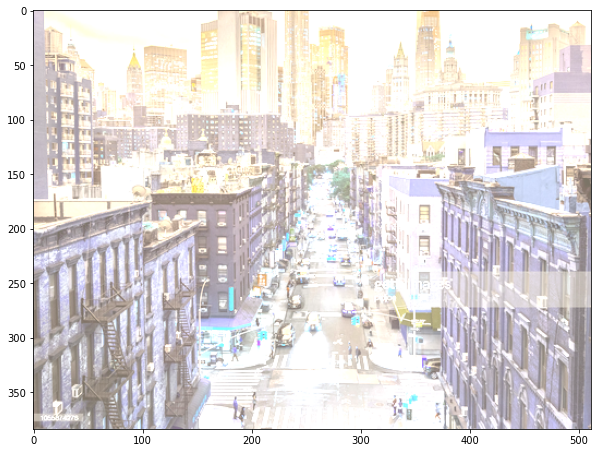

In [20]:
plt.imshow(deprocess_img(content))
plt.show()

### 2.5. Define content and style representation, and build the model

As mentioned earlier it is believed that image content is found in the last convolutional layers, whereas style flows throughout the whole network. However, before to proceed with explaining Style Transfer in detail, it is better first to describe VGG architecture, its elements and settings.

#### 2.5.1. The VGG architecture

VGG is an abbreviation of "Visual Geometry Group" - a department at the University of Oxford. It became popular in 2014 when won the **ImageNet** competition (Large Scale Visual Recognition Challenge).

> ImageNet project is a large visual database designed for use in visual object recognition software research. More than 14 million images have been hand-annotated by the project to indicate what objects are pictured and in at least one million of the images, bounding boxes are also provided. ImageNet contains more than 20,000 categories with a typical category, such as "balloon" or "strawberry", consisting of several hundred images. [ImageNet website](http://www.image-net.org/), [Wikipedia info](https://en.wikipedia.org/wiki/ImageNet)

VGG architecture is well described in Simonyan and Zisserman's paper[13] titled "*Very Deep Convolutional Networks for Large-Scale Image Recognition*". As explained there, the net gets a fixed-size 224 × 224 RGB image. The only preprocessing the authors did was to subtract the mean RGB value from each pixel. Then, the image was passed through a stack of **convolutional layers** (several configurations were examined), with **filters** with a very small **receptive field: 3 × 3**. In VGG16 configuration they utilised 1 × 1 convolution filters, which can be seen as a linear transformation of the input channels (followed by non-linearity). 
>[Convolutional layer](https://cs231n.github.io/convolutional-networks/): it is the core building block of a Convolutional Network that does most computations. A convolutional layer accepts an image of size $W_1$ x $H_1$ x $D_1$ (width x height x depth); their spatial extent $F$ (usually 3 × 3, 5 × 5, or 7 × 7; rarely combination of even digits); the stride $S$ (see below); and the amount of zero-padding $P$ (see below)

> [Convolutional filter (kernel)](https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37): extracts certain ‘features’ from an input image. A kernel is a matrix, which is slid across the image and multiplied with the input such that the output is enhanced in a certain desirable manner. Its number is a hyperparameter of the convolutional network.

> [Receptive field](https://medium.com/mlreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807): it is defined as the region in the input space that a particular CNN’s feature is looking at (i.e. be affected by). A receptive field of a feature can be described by its center location and its size. However, not all pixels in a receptive field are equally important to its corresponding CNN’s feature. Within a receptive field, the closer a pixel to the center of the field, the more it contributes to the calculation of the output feature. Which means that a feature does not only look at a particular region (i.e. its receptive field) in the input image, but also focus exponentially more to the middle of that region.

The convolution **stride** is fixed to 1 pixel. The spatial **padding** of convolutional layer input is such that the spatial resolution is preserved after convolution, i.e. the padding is 1 pixel for 3 × 3 convolutional layers. Spatial **pooling** is carried out by five max-pooling layers, which follow some of the convolutional layers (not all the convolutional layers are followed by max-pooling). Max-pooling is performed over a 2 × 2 pixel window, with stride 2 (VGG configurations examined by Simonyan and Zisserman are displayed in Figure 2 below).

> [Stride](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks): For a convolutional or a pooling operation, the stride $S$ denotes the number of pixels by which the window moves after each operation.

> [Padding (zero-padding)](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks): Zero-padding denotes the process of adding $P$ zeroes to each side of the boundaries of the input. This value can either be manually specified or automatically set. Padding set to "Valid" means not padding is added at all. Padding set to "same" returns output with dimensions equal to the input. "Same" padding is computed as 1 is subtracted from the filter size and the result is divided by 2 ($P = \frac{f - 1}{2}$).

> [Pooling layers](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/): Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. Two common pooling methods are average pooling and max pooling that summarize the average presence of a feature and the most activated presence of a feature respectively.

A stack of convolutional layers (which has a different depth in different architectures) is followed by three **fully connected layers**: the first two have 4096 channels (units) each, the third performs 1000-way classification and thus contains 1000 channels (one for each image class). The final layer is the **softmax** layer (a layer with softmax activation function). The configuration of the fully connected layers is the same in all tried networks.
> [Fully connected layer](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks#layer): The fully connected layer operates on a flattened input where each input is connected to all neurons. If present, fully connected layers are usually found towards the end of CNN architectures and can be used to optimize objectives such as class scores.

> [Activation function (non-linearity)](https://www.geeksforgeeks.org/activation-functions-neural-networks/): Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

> [Softmax](https://machinelearningmastery.com/softmax-activation-function-with-python/): Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector. The network is configured to output N values, one for each class in the classification task, and the softmax function is used to normalize the outputs, converting them from weighted sum values into probabilities that sum to one. Each value in the output of the softmax function is interpreted as the probability of membership for each class. Softmax is computed with the following [formula](https://deepai.org/machine-learning-glossary-and-terms/softmax-layer): $\sigma(\vec{z})_i = \frac{e^z_i}{\sum\limits_{j=1}^{K}e^z_j}$, where all the $z_i$ values are the elements of the input vector and can take any real value. The term on the bottom of the formula is the normalization term which ensures that all the output values of the function will sum to 1, thus constituting a valid probability distribution. $e^z_i$ is the standard exponential function applied to each element of the input vector. This gives a positive value above 0, which will be very small if the input was negative, and very large if the input was large. However, it is still not fixed in the range (0, 1) which is what is required of a probability. $K$ is the number of classes in the multi-class classifier.

All **hidden layers** are equipped with **rectification (ReLU) non-linearity**. The width of convolutional layers (the number of channels) is rather small, starting from 64 in the first layer and then increasing by a factor of 2 after each max-pooling layer, until it reaches 512.
> [Hidden layers](https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning): A hidden layer is located between the input and output of the algorithm, in which the function applies weights to the inputs and directs them through an activation function as the output. In short, the hidden layers perform nonlinear transformations of the inputs entered into the network. 

> [ReLU (Rectified Linear Unit)](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/): It is a linear function that will output the input directly if it is positive, otherwise, it will output zero ($ReLU max(0, x)$). I.e. if $x \leq 0 $, its gradients are $0$, and if $x > 0$ - gradients are equal to $1$.


The authors remind that regardless of large depth, the number of **weights** in the examined nets is not greater than the number of weights in a more shallow net with larger convolutional layer widths and receptive fields.
> Weights: weights of a Neural Network are the coefficients of each unit, which are updated during backpropagation after each epoch of training so as to minimize the Loss function.

**Figure 2. VGG architecture**

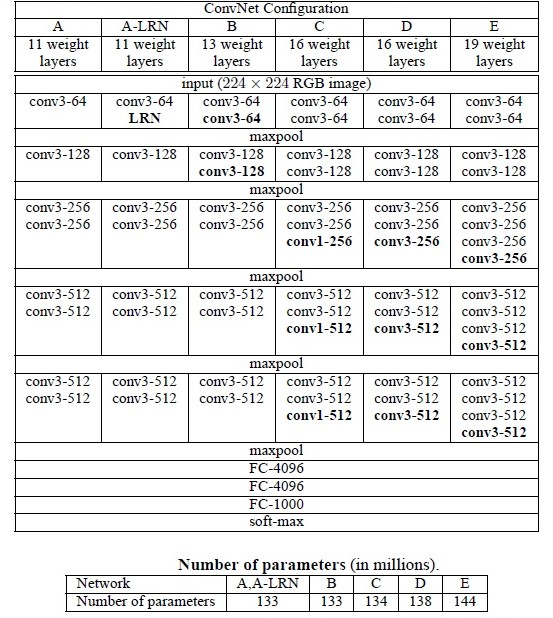

Source: Simonyan and Zisserman, "*Very Deep Convolutional Networks for Large-Scale Image Recognition*"

Keras allows loading VGG16 and/or VGG19, both pre-trained on ImageNet.

`VGG19` accepts several arguments. The first one, "include_top", tells whether to include the 3 fully-connected layers at the top of the network. Transferring Style does not need the fully connected layers. Nonetheless, the code lines below load the whole network. The second, "weights", if left "None" will load the model with random initialization (i.e. untrained network). When set to "imagenet", the function loads the weights computed after training on ImageNet. Also, a path to a file with weights could be given as a second argument. Information about the other arguments (not used in this case) could be found on [Keras page](https://keras.io/api/applications/vgg/). The loaded model is stored in `vgg19_model` and displayed by applying `summary()` over it.

In [21]:
vgg19_model = tf.keras.applications.vgg19.VGG19(include_top = True, weights = "imagenet")

574717952/574710816 [==============================] - 3s 0us/step


In [22]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

The scheme above shows the layers, each layer input’s size, and the number of trained parameters. All 143.7 million parameters are trainable in this configuration. If needed, their status could be changed to "non-trainable." VGG19's weight matrix is shown below.

In [23]:
vgg19_model.weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
 array([[[[ 0.34119523,  0.09563112,  0.0177449 , ..., -0.11436455,
           -0.05099866, -0.00299793],
          [ 0.46418372,  0.03355668,  0.10245045, ..., -0.06945956,
           -0.04020201,  0.04048637],
          [ 0.39416704, -0.08419707, -0.03631314, ..., -0.10720515,
           -0.03804016,  0.04690642]],
 
         [[ 0.33999205,  0.13363543,  0.02129423, ..., -0.13025227,
           -0.16508926, -0.06969624],
          [ 0.41810837,  0.05260524,  0.09755926, ..., -0.09385028,
           -0.20492788, -0.0573062 ],
          [ 0.37740308, -0.07876257, -0.04775979, ..., -0.11827433,
           -0.19008617, -0.01889699]],
 
         [[-0.04484424,  0.06471398, -0.07631404, ..., -0.12629718,
           -0.29905206, -0.2825364 ],
          [-0.04806903, -0.00658076, -0.02234544, ..., -0.0878844 ,
           -0.3915486 , -0.34632796],
          [-0.04594866, -0.11583115, -0.14462094, ..., -0.12290562

The source tutorial suggests using the second convolutional layer of block 5 for *content layer* (see below) and the first convolutional layers of all blocks - for *style layers*. Therefore, it would be interesting to see what the weights in each of these layers are (see the histograms below). A list of all layers with their index is displayed. It is followed by a list with the chosen layers (`layers_to_examine`).

In [24]:
[(index, layer.name) for (index, layer) in enumerate(vgg19_model.layers)]

[(0, 'input_1'),
 (1, 'block1_conv1'),
 (2, 'block1_conv2'),
 (3, 'block1_pool'),
 (4, 'block2_conv1'),
 (5, 'block2_conv2'),
 (6, 'block2_pool'),
 (7, 'block3_conv1'),
 (8, 'block3_conv2'),
 (9, 'block3_conv3'),
 (10, 'block3_conv4'),
 (11, 'block3_pool'),
 (12, 'block4_conv1'),
 (13, 'block4_conv2'),
 (14, 'block4_conv3'),
 (15, 'block4_conv4'),
 (16, 'block4_pool'),
 (17, 'block5_conv1'),
 (18, 'block5_conv2'),
 (19, 'block5_conv3'),
 (20, 'block5_conv4'),
 (21, 'block5_pool'),
 (22, 'flatten'),
 (23, 'fc1'),
 (24, 'fc2'),
 (25, 'predictions')]

In [25]:
layers_to_examine = [1, 4, 7, 12, 17, 18]

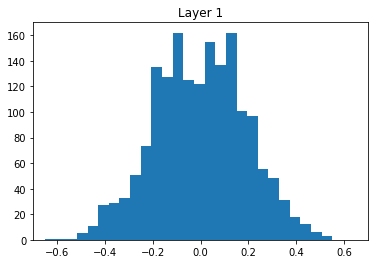

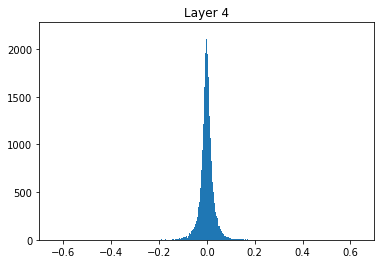

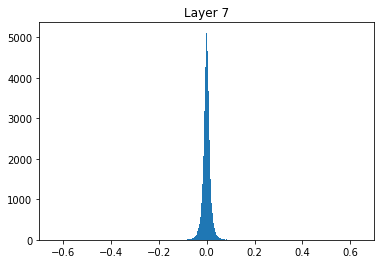

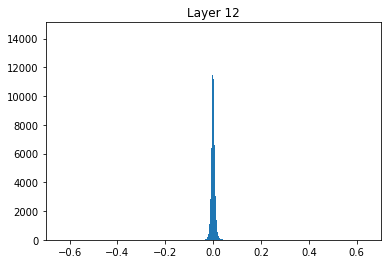

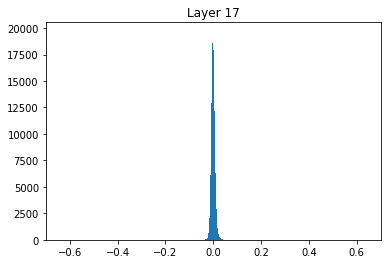

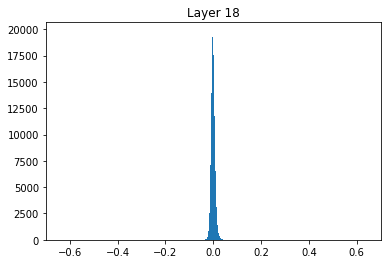

In [26]:
# Display weights in chosen layers
for i in layers_to_examine:
    plt.figure(figsize = (6, 4))
    plt.hist(vgg19_model.layers[i].kernel.numpy().ravel(), bins = "fd")
    plt.xlim(-0.7, 0.7)
    plt.title(f"Layer {i}")
    plt.show()

It is interesting to note that weights in the bottom layer (block1_conv1) resemble Gaussian distribution. This is expected since weights are initialized as normal distribution (i.e. all values are equally distributed). Thereafter, as training goes on, weights begin to center around zero. This is most visible in the last layers ("block5_conv1" and "block5_conv2"), where most values are equal to or very close to 0 (scales are taken into account). The latter means that a tiny number of filters’ elements generates outputs (feature maps).

#### 2.5.2. Define Content and Style Representation

Content and Style representations are defined (as Python lists) by setting the layer(s) to pull out feature maps from. Number of layers in both variables are used in subsequent functions. Therefore, they are computed and stored separately.

It should be noted here that Gatys et al.[2] draw attention to the fact that the choice of layers to match content and style representation is another important factor in the image generation process. They found that in higher layers of the network (e.g. "block5_conv2"), detailed pixel information is lost while the high-level content of the image is preserved. Furthermore, style representation is a multi-scale representation that includes multiple layers of the neural network. The number and position of these layers determines the local scale on which the style is matched, leading to different visual experiences. They also found that the visually most appealing images are usually created by matching the style representation up to high layers in the network, which is why they use layers "conv1 1", "conv2 1", "conv3 1", "conv4 1" and "conv5 1" of VGG network.

In [27]:
content_layers = ["block5_conv2"]

In [28]:
style_layers = ["block1_conv1",
                "block2_conv1",
                "block3_conv1", 
                "block4_conv1", 
                "block5_conv1"
               ]

In [29]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [30]:
print(num_content_layers)
print(num_style_layers)

1
5


#### 2.5.3. Build the Style Transfer Model

`vgg19_model` above was loaded only for demonstration. The function below loads VGG19 again and will access the chosen intermediate layers (as defined above). These will then be used to create a new model that will take input image and will return the outputs from these intermediate layers.

"include_top" is set to "False" since the last (Dense) layers are not necessary for Style Transfer. Furthermore, parameters are changed to non-trainable (by setting "trainable" to "False"). The latter means that an image passed through the network will not train it and its weights will not be adjusted, accordingly.

Output is defined with a list comprehension and the results are stored in `style_outputs` and `content_outputs`, respectively. Both are concatenated in `model_otputs`.

The model gets input (images) with dimensions as defined above, and outputs content and style layers (as chosen earlier).

In [31]:
def get_model():
    """
    Function: Creates model with access to intermediate layers. 
    
    Arguments: None.
    
    Returns: a Keras model that takes image inputs and outputs the style and content intermediate layers.
    """
    # Load pretrained VGG, trained on imagenet data; freeze weights
    vgg = vgg19.VGG19(include_top = False, weights = "imagenet")
    vgg.trainable = False
    
    # Get output layers corresponding to style and content layers 
    style_outputs = [vgg.get_layer(name).output for name in style_layers]
    content_outputs = [vgg.get_layer(name).output for name in content_layers]
    model_outputs = style_outputs + content_outputs
    
    # Build model
    return Model(vgg.input, model_outputs)

### 2.6. Define and create loss functions

#### 2.6.1. Define and create Content loss (content representation)

Gatys et al.[2] argues that "to visualise the image information that is encoded at different layers of the hierarchy one can perform gradient descent on a white noise image to find another image that matches the feature responses of the original image". They compute **Content loss** with the following formula: 

$$L_{content}(\vec{p},\vec{x},l) = \frac{1}{2}\sum\limits_{i,j}(F_{ij}^l - P_{ij}^l)^2$$,

where $\vec{p}$ is the original image and $\vec{x}$ is the image that is generated. $P^l$ and $F^l$ are their respective feature representation in layer $l$. Thus, $L_{content}$ is defined as the squared-error loss between the two feature representations. The derivative of this loss with respect to the activations in layer $l$ equals 

$$\begin{equation}
  \frac{\partial L_{content}}{\partial F_{ij}^l} =
    \begin{cases}
      (F^l - P^l)_{ij} \quad if F_{ij}^l > 0\\
      0 \quad \quad \quad \quad \quad if F_{ij}^l < 0\\
    \end{cases}       
\end{equation}$$

from which the gradient with respect to the image $\vec{x}$ can be computed using standard error back-propagation. Thus, image $\vec{x}$ is randomly changed until it generates the same response in a certain layer of the Convolutional Neural Network as the original image $\vec{p}$. 

Content loss is computed with the function below.

In [32]:
def get_content_loss(base_content, target):
    """
    Function: Computes content loss. 
    
    Arguments: Image to be generated, original image 'p'.
    
    Returns: Mean square error between generated and original image.
    """
    return tf.reduce_mean(tf.square(base_content - target))

The function (`get_content_loss`) receives as inputs any image, or white noise (which will serve as a basis for image generation) and the original (content) image. The goal is to reduce as much as possible their squared difference. The latter is performed with TensorFlow's `tf.reduce_mean()` function, which computes the mean of elements across dimensions of a tensor.

#### 2.6.2. Define and create Style loss (style representation)

Defining and computing **Style loss** is much more complex. Gatys et al.[2] use a feature space designed to capture texture information in order to obtain a representation of the style of an input image. This feature space can be built on top of the filter responses *in any layer of the network*. It consists of the correlations between the different filter responses, where the expectation is taken over the spatial extent of the feature
maps. These feature correlations are given by the **Gram matrix**, where $G_{ij}^l$ is the inner product between the vectorised feature maps $i$ and $j$ in layer $l$. The Gram matrix is computed with the following formula:

$$G_{ij}^l = \sum\limits_{k}(F_{ik}^lF_{jk}^l)$$

Each layer $l$ makes a certain type of convolution. Upper layers hold more abstract representations. Style is defined as the value, which remains similar across neurons and layers (between two convolutional filters). In other words, style is preserved in all filters regardless of their "task". Activations of all filters display their correlations. Thus, a Correlation matrix (Gram matrix) indicates the links between feature maps (e.g. between the first one with itself, between the first and the second ones, etc.). When a vector (ravelled image values) is similar to another, the formula returns its squared length. When two vectors are different, these are considered orthogonal, and their dot product equals 0.

In practice, style is preserved between filters. It is transferred when the correlation between filters remains strong.

It should be noted here that content in the lowest layers remains quite identical to the one of the original image. Middle layers make content more and more abstract and much more distant from the original one. The opposite is valid for  style. First layers catch only image's basic style. Later on these features become more and more complex, which suggests that the Neural Network learns the style.

Gatys et al.[2] propose the following formula to compute Style loss:

$$E_l = \frac{1}{4N_l^2M_l^2} \sum \limits_{i,j}(G_{ij}^l - A_{ij}^l)^2 $$ and 
$$L_{style}(\vec{a}, \vec{x}) = \sum \limits_{l=0}^L w_lE_l$$

where $E_l$ is the contribution of layer $l$ to the style loss; $\vec{a}$ and $\vec{x}$ are the original image and the generated image, and $A^l$ and $G^l$ their respective style representation in layer $l$. $N_l^2$ is the squared value of the feature maps produced from the given layer, and $M_l^2$ is the squared size of the respective feature maps ($M$ is the product of feature map's height and width). $w_l$ are weighting factors of the contribution of each layer to the style loss.

Style loss is computed by using gradient descent from a white noise image to minimise the mean squared distance between the entries of the Gram matrices from the original image and the Gram matrices of the image to be generated. 
Gatys et al.[2] compute derivative of $E_l$ with respect to the activations in layer $l$ with the following expression:
$$\begin{equation}
  \frac{\partial E_l}{\partial F_{ij}^l} =
    \begin{cases}
      \frac{1}{N_l^2M_l^2}\big((F^l)^T (G^l - A^l)\big) \quad if F_{ij}^l > 0\\
      0 \quad \quad \quad \quad \quad \quad \quad \quad if F_{ij}^l > 0\\
    \end{cases}       
\end{equation}$$

The gradients of $E_l$ with respect to the pixel values $\vec{x}$ can be readily computed using standard error back-propagation. 

Gram matrix and Style loss are computed with `gram_matrix()` and `get_style_loss()` as defined below.

In [33]:
def gram_matrix(input_tensor):
    """
    Function: Computes correlation (Gram) values. 
    
    Arguments: Image (tensor).
    
    Returns: Gram matrix.
    """
    # Make the image channels first 
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a = True)
    return gram / tf.cast(n, tf.float32)

Computing `gram_matrix` requires setting the number of tensor's channels. This is performed by taking the last dimension of input tensor's shape and storing the value as an integer in `channels`. Thereafter, input tensor values are stored as two-dimensional tensors (`a`), where the first dimension shows the flattened number of pixels (vectors), and the second - the number of channels. Vectors are stored in another variable (`n`).

Gram computations (stored in `gram`) are made with TensorFlow's `matmul()` function. It receives two arguments (both tensors), e.g. 'a' and 'b'; tensor 'b' must be the same type and rank as 'a'. In our case, 'a' and 'b' are one and same vector. "transpose_a" set to "True" means 'a' will be transposed before multiplication. The latter is a precondition for computing the Correlation matrix.

This function returns the Gram (Correlation) matrix, computed as the ratio between vector correlations and their number. Values are returned as float32 type.

In [34]:
def get_style_loss(base_style, gram_target):
    """
    Function: Computes style loss. 
    
    Arguments: Expects generated image and original image.
    
    Returns: Style loss.
    """
    # height, width, num filters of each layer
    # Scale loss at a given layer by the size of the feature map and the number of filters
    height, width, channels = base_style.get_shape().as_list()
    gram_style = gram_matrix(base_style)
    
    # / (4. * (channels ** 2) * (width * height) ** 2)
    return tf.reduce_mean(tf.square(gram_style - gram_target))

Style loss is going to be computed with `get_style_loss`. It accepts a 'base_style' - the style of the generated image, and a 'gram_target' - the style of the original image (style image). Both images should have the same dimensions. Height, width, and the number of filters in each layer (`height`, `width`, and `channels`, respectively) of each tensor are taken from 'base_style' (generated image) by applying TensorFlow's `get_shape()` method, and `as_list()` afterwards. The gram style (`gram_style`) is computed as an output of `gram_matrix()`, which processes 'base_style' image. 

Then, the function returns Style loss computed as the mean squared difference between `gram_style` and the `gram_target` (original image).

#### 2.6.3. Define and create Loss for Style Transfer 

To transfer style of an image $\vec{a}$ onto a photograph $\vec{p}$, Gatys et al.[2] synthesise a new image that simultaneously matches the content representation of $\vec{p}$ and the style representation of $\vec{a}$. Thus, feature representations’ distance between an initial and source images are simultaneously minimised by taking into account the values of content photograph (from one layer) and those of style representations of a painting (extracted from a number of layers). The **Total loss** function is defined as follows: 

$$L_{total}(\vec{p}, \vec{a}, \vec{x}) = \alpha L_{content}(\vec{p}, \vec{x}) + \beta L_{style}(\vec{a}, \vec{x})$$

where $\alpha$ and $\beta$ are the weighting factors for content and style reconstruction, respectively. The gradient with respect to the pixel values $\frac{\partial L_{total}}{\partial \vec{x}}$ can be used for some numerical optimization. Total loss is computed with `compute_loss` below.

### 2.7. Apply style transfer

#### 2.7.1. Get Content and Style representations

The function helps for loading content and style images, for feeding them forward through the network, and for returning content and style feature representations from the model. 

Images are loaded and pre-processed with `load_and_preprocess()` function created earlier. It expects the path to the image. Processed values are stored in `content_image` and `style_image`, respectively.

Thereafter, processed images are run through the model. The outputs are saved in `content_outputs` and `style_outputs`. Features are extracted with a list comprehension over outputs. `style_features` are found in all style outputs of each layer until the fifth one. Content feature representations (`content_features`), on the other hand, are extracted from content outputs of layers after the fifth.

In [35]:
def get_feature_representations(model, content_path, style_path):
    """
    Function: Loads and preprocess both the content and style images
                from their path. Thereafter, the function will feed them through
                the network to get outputs of the intermediate leyers.
    
    Arguments: model: The model that will be used.
                content_path: The path to the content image.
                style_path: The path to the style image
    
    Returns: The style features and the content features.
    """
    # Load images in
    content_image = load_and_process_img(content_path)
    style_image = load_and_process_img(style_path)
    
    # batch compute content and style features
    content_outputs = model(content_image)
    style_outputs = model(style_image)

    # Get style and content feature representations from model  
    style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
    content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
    
    return style_features, content_features

#### 2.7.2. Compute Loss and Gradients

The **loss function** is one of the most important hyperparameters of a Neural Network. As mentioned earlier, the task of style transfer is to preserve and transmit content of one image, and the style of another, and to combine them into a third one, generated from nothing (or from a base image). Therefore, $L_{content}$ and $L_{style}$ should be minimised simultaneously ($L_{total}$), to the maximum extent.
> A loss function is [defined](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23) as a method of evaluating how well specific algorithm models the given data.

The function below computes all losses. To do this, it needs the model, loss weights, the initial image, Gram style features and Content features. `style_weight` and `content_weight` are taken from loss weights. The initial image is fed through the model to extract content and style representations from selected layers. Eager execution here helps for making the model callable as any other function. The outputs are stored in `model_outputs`. Number of style layers is used for extracting `style_output_features` (from network's lower layers) and `content_output_features` (from network's upper layers).

Style and content weights are updated many times until loss functions reach their minimum. In order to secure that, the function has $L_{style}$ (`style_score`) and $L_{content}$ (`content_score`) initialized with 0. During back-propagation, computed scores update style and content weights, accordingly. Their accumulation is explained shortly. It should be noted, however, that each layer equally contributes to weights (`weight_per_style_layer` and `weight_per_content_layer)`. This can be seen below, where each variable is calculated as a ratio between 1 and the number of layers. Thus, weights of each style layer contribute with 20% to the total style weight, and those of content style - with 100% (since only one layer was selected for transferring content).

`style_score` and `content_score` are incremented with the product of each layer's weight and the optimized loss between combined style/content and the target values. The latter are taken from the Gram matrices corresponding to the selected style layers and from precomputed outputs of the chosen content layers.

The sum of style and content loss (`style_score` and `content_score` respectively) results in $L_{total}$ (`loss`). The function returns all three losses.

In [36]:
def compute_loss(model, loss_weights, init_image, gram_style_features, content_features): 
    """
    Function: Computes Total loss.
    
    Arguments: model: The model that will give access to the intermediate layers 
                loss_weights: The weights of each contribution of each loss function. 
                      (style weight, content weight, and total variation weight)
                init_image: The initial base image. This image is what is updated with the optimization process. 
                        Gradients are applied with regard to the loss that is being calculated to this image.
                gram_style_features: Precomputed gram matrices corresponding to the defined style layers of interest.
                content_features: Precomputed outputs from defined content layers of interest.
    
    Returns: Total loss, Style loss, and Content loss.
    """
    
    style_weight, content_weight = loss_weights

    # Feed init image through model. This will give content and 
    # style representations at desired layers.
    model_outputs = model(init_image)
  
    style_output_features = model_outputs[:num_style_layers]
    content_output_features = model_outputs[num_style_layers:]
  
    style_score = 0
    content_score = 0

    # Accumulate style losses from all layers
    # Equally weight each contribution of each loss layer
    weight_per_style_layer = 1.0 / float(num_style_layers)
    for target_style, comb_style in zip(gram_style_features, style_output_features):
        style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)
    
    # Accumulate content losses from all layers
    weight_per_content_layer = 1.0 / float(num_content_layers)
    for target_content, comb_content in zip(content_features, content_output_features):
        content_score += weight_per_content_layer* get_content_loss(comb_content[0], target_content)
  
    style_score *= style_weight
    content_score *= content_weight

    # Get total loss
    loss = style_score + content_score 
    return loss, style_score, content_score

Another important step for transferring style is to get gradients. The latter are computed with **Gradient Descent**.
> [Gradient descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html) is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, gradient descent is used to update the weights of neural networks.

Gradients for style transfer are computed with `compute_grads` function. It accepts data (dictionary) used for calculating the loss function above (see the function in the next subchapter). All three losses are stored in `all_loss`. The latter is opened and processed with TensorFlow's `GradientTape()` (utilized as `tape`). It records operations for automatic differentiation, as explained by [TensorFlow's documentation](https://www.tensorflow.org/api_docs/python/tf/GradientTape#gradient). Automatic differentiation is useful for implementing machine learning algorithms such as backpropagation for training neural networks. To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients.

Only the total loss (extracted from `all_loss` at index 0) is used for computing gradients. `gradient` method of `GradientTape()` outputs a list of gradients. It expects a *target*, i.e. a list of Tensors or Variables to be differentiated (`total_loss` in our case), and *sources* - another list of Tensors or Variables. The former is differentiated against elements in the sources. In our case, the *sources* are the values of the initial image (`cfg['init_image']`) as produced by `compute_loss`.

This function returns gradients and all three loss functions ($L_{total}$, $L_{content}$, and $L_{style}$).

In [37]:
def compute_grads(cfg):
    """
    Function: Computes gradients.
    
    Arguments: Data used for computing the previous loss function.
    
    Returns: A list of gradients, one for each element of target, and all losses.
    """
    with tf.GradientTape() as tape: 
        all_loss = compute_loss(**cfg)

    # Compute gradients with regard to input image
    total_loss = all_loss[0]
    return tape.gradient(total_loss, cfg['init_image']), all_loss

#### 2.7.3. Optimization Loop

Finally, perhaps the most complex function is the one that runs style transfer. It expects 5 arguments: paths both to content and style images, number of iterations (i.e. forward pass and backward propagation for updating loss until values of initial image converge with those of target pictures), and content and style weight in Total loss. In this example, `content_weight` is set to 1000 (1e3) and `style_weight` - to 0.01 (1e-2). The loop goes for 1000 iterations. Comments are left for clarity.

The first thing this function does is to call and store the model. This is performed by calling `get_model()`, which is stored in `model`. Since Style Transfer does not represent training of a Neural Network in its classical form (i.e. to adjust weights so as predicted output to match real output), layers’ weights, which hold ImageNet pretrained weights, are not updated. Instead, they are "frozen" by setting all layers to `trainable = False`. This means that ImageNet weights will adjust the base image pre-processed pixel values instead the opposite.

The next task is to get style and content feature representations from the chosen intermediate layers. This is performed by running `get_feature_representations()`defined earlier. It needs the mode, and the paths both to content and style images. Gram style features (`gram_style_features`) are also extracted at this stage. To that end, a list comprehension gets each style feature from `style_features` computed earlier.

The initial image is defined as an image identical to the content one (by `load_and_preprocess_img()`. It is stored as `init_image` which then is set to tf.float32 `Variable()`. The latter means that `init_image` is turned into trainable model parameters.

An important step is choosing model's **optimizer**. Gatys et al.[2] use [L-BFGS]( https://en.wikipedia.org/wiki/Limited-memory_BFGS), which gives [better resutls](https://github.com/cysmith/neural-style-tf/blob/master/neural_style.py). The present example is implemented with **Adam** since it is much faster and uses less memory.
> [Optimizers](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6) are algorithms or methods used to change the attributes of neural networks such as weights and learning rate in order to reduce the losses.

> **Adam**[14] is a method for efficient stochastic optimization that only requires first-order gradients with little memory requirement. The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

Optimizer configuration is stored in `opt` variable. Learning rate is set to 5, exponential decay rate for the 1st moment estimates (beta_1) is increased to 0.99 (it defaults to 0.9); epsilon (a small constant for numerical stability) is also increased from 1e-7 to 1e-1 (0.1).

A variable (`iter_count`) is initiated at 1, which will be used for displaying intermediate images. Best results are stored in `best_loss` and `best_img`. `loss_weights` are given as a tuple (style and content weight).

The configuration (`cfg`) needed for computing gradients in the previous function is defined as a dictionary with 5 keys and their respective values, which are arguments for `compute_loss()` defined a few steps earlier.

In [38]:
def run_style_transfer(content_path, 
                       style_path,
                       num_iterations = 1000,
                       content_weight = 1e3, 
                       style_weight = 1e-2): 
    """
    Function:   Runs style transfer and displays the generated intermediate and final images.
    
    Arguments:  Paths to content image and to style image, number of iterations
                content weight, and style weight.
    
    Returns:    The best image generated with style transfer, the minimum of the total loss.
    """
    
    # No need to train any layers, so trainable layers are set to false. 
    model = get_model() 
    for layer in model.layers:
        layer.trainable = False
  
    # Get style and content feature representations from specified intermediate layers 
    style_features, content_features = get_feature_representations(model, content_path, style_path)
    gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]
  
    # Set initial image (white noise)
    init_image = load_and_process_img(content_path)
    init_image = tf.Variable(init_image, dtype = tf.float32)
  
    # Create optimizer
    opt = tf.keras.optimizers.Adam(learning_rate = 5, beta_1 = 0.99, epsilon = 1e-1)

    # Display intermediate images 
    iter_count = 1
  
    # Store best result
    best_loss, best_img = float('inf'), None
  
    # Create a nice configuration 
    loss_weights = (style_weight, content_weight)
    cfg = {
            "model": model,
            "loss_weights": loss_weights,
            "init_image": init_image,
            "gram_style_features": gram_style_features,
            "content_features": content_features
    }
    
    # Display content, style and generated images
    num_rows = 2
    num_cols = 5
    display_interval = num_iterations / (num_rows * num_cols)
    start_time = time.time()
    global_start = time.time()
  
    norm_means = np.array([103.939, 116.779, 123.68])
    min_vals = -norm_means
    max_vals = 255 - norm_means   
  
    imgs = []
    for i in range(num_iterations):
        grads, all_loss = compute_grads(cfg)
        loss, style_score, content_score = all_loss
        opt.apply_gradients([(grads, init_image)])
        clipped = tf.clip_by_value(init_image, min_vals, max_vals)
        init_image.assign(clipped)
        end_time = time.time() 
    
        if loss < best_loss:
            # Update best loss and best image from total loss. 
            best_loss = loss
            best_img = deprocess_img(init_image.numpy())

        if i % display_interval == 0:
            start_time = time.time()
      
            # Use the .numpy() method to get the concrete numpy array
            plot_img = init_image.numpy()
            plot_img = deprocess_img(plot_img)
            imgs.append(plot_img)
            IPython.display.clear_output(wait=True)
            IPython.display.display_png(Image.fromarray(plot_img))
            print("Iteration: {}".format(i))        
            print("Total loss: {:.4e}, " 
                    "style loss: {:.4e}, "
                    "content loss: {:.4e}, "
                    "time: {:.4f}s".format(loss, style_score, content_score, time.time() - start_time))
    print("Total time: {:.4f}s".format(time.time() - global_start))
    IPython.display.clear_output(wait = True)
    plt.figure(figsize = (14, 4))
    for i,img in enumerate(imgs):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
      
    return best_img, best_loss

Mixed images should not only be computed but displayed as well. Intermediate outputs are displayed as a two-rows and five-columns grid at an interval (`display_interval`) equal to the ratio between iterations (`num_iterations`) and the product of rows and columns (i.e. 10). Time is also computed, as difference is made between `strat_time` and `global_time`. `start_time` begins when the ratio between each iteration (`i`) and display interval produces zero after the decimal point (i.e. when modular division results in 0) (see few lines below).

Channel (RGB: red, green, blue) means, which are used for normalizing values of synthesised image are stored in a NumPy list (`norm_means`). Minimum values (`min_vals`) equal the negative means, whereas maximum ones (`max_vals`) - the difference between RGB's max (255) and the means.

An empty list for images is initialized. It stores the de-processed ones. Thereafter, gradients (`grads`) and all losses (`all_loss`) are computed at each iteration. All losses are decomposed to `loss` ($L_{total}$), `style_score` ($L_{style}$), and `content_score` ($L_{content}$).

Then, Keras `apply_gradients` method is applied to the optimizer (`opt`). `apply_gradients` apply gradients to variables, and thus needs a list of (gradient, variable) pairs. In the present example, these are computed gradients (`grads`) and the initial image (`init_image`). Thereafter, the initial image's values are limited (by TensorFlow's `clip_by_value`) to the minimum and maximum values set earlier, and stored in `clipped`. The initial image, which was defined as a `tf.Variable()` a dozen lines above, gets `assign()` method with `clipped` values. `assign` method assigns a new value to the variable. These computations end with computing `end_time`.

This function also checks and updates best loss. Provided that `best_loss` is greater than current `loss`, the latter becomes `best_loss`. `best_image` is the one generated with the for-loop. It is converted to a NumPy array and de-processed by `deprocess_img`.

Initial image is converted to a NumPy array and stored in a variable `plot_img`. It (as the best one) is de-processed, too. Then, each intermediate image is added to `imgs` list. 

IPython and Matplotlib are used for displaying images. IPython's `display.clear_output` waits for clearing the output until new output is available to replace it. Thereafter, `display.display_png` helps for showing the image for plotting (`plot_img`).

For each displayed image, the number of iterations is printed when an iteration meets the above condition (modular division between iteration and displaying interval equals 0). Furthermore, all three losses and the duration for their computation are printed for each intermediate image.

The total time needed for Style Transfer is printed at the end. Generated images (`imgs`) are displayed beneath. The function returns the best image (`best_img`) and the minimized loss function (`best_loss`).

#### 2.7.4. Run Style Transfer to the selected pair of images

Style transfer is applied by running `run_style_transfer()` over content and style images, and for 1000 iterations. Content and style weights are not changed. Computations on CPU take around 80 minutes, whereas on GPU - less than 5. Results are stored in `best` for image and in `best_loss` for the loss. The former is a 'uint8' array, and the latter - a tensor. The best image is displayed below.

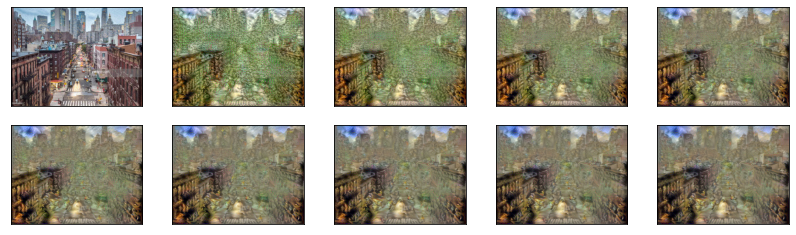

In [39]:
best, best_loss = run_style_transfer(CONTENT_PATH, 
                                     STYLE_PATH, 
                                     num_iterations = 1000)

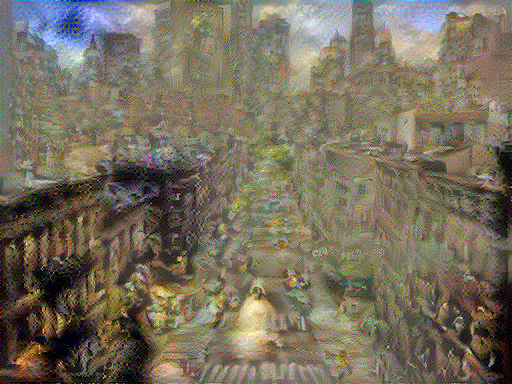

In [40]:
Image.fromarray(best)

A brief look at losses shows that all of them diminish over time. Initially, content loss is equal to 0 which means the generated image was initialized with content picture. Thereafter, content loss increased, but drops over each iteration. Smaller loss means the "distance" between the original and the synthesised images diminishes. These figures are compared with those obtained with ResNet50 network.


`Iteration: 0: Total loss: 3.7532e+08, style loss: 3.7532e+08, content loss: 0.0000e+00, time: 0.0848s`

`Iteration: 100: Total loss: 1.4055e+07, style loss: 1.0773e+07, content loss: 3.2815e+06, time: 0.0812s`

`Iteration: 200: Total loss: 6.3878e+06, style loss: 3.7581e+06, content loss: 2.6297e+06, time: 0.0690s`

`Iteration: 300: Total loss: 3.8080e+06, style loss: 1.8221e+06, content loss: 1.9859e+06, time: 0.0625s`

`Iteration: 400: Total loss: 2.6755e+06, style loss: 1.1273e+06, content loss: 1.5483e+06, time: 0.0718s`

`Iteration: 500: Total loss: 2.0929e+06, style loss: 8.1146e+05, content loss: 1.2814e+06, time: 0.0738s`

`Iteration: 600: Total loss: 1.7578e+06, style loss: 6.4681e+05, content loss: 1.1110e+06, time: 0.0846s`

`Iteration: 700: Total loss: 1.5475e+06, style loss: 5.5018e+05, content loss: 9.9734e+05, time: 0.0690s`

`Iteration: 800: Total loss: 1.4062e+06, style loss: 4.8901e+05, content loss: 9.1721e+05, time: 0.0690s`

`Iteration: 900: Total loss: 1.3044e+06, style loss: 4.4458e+05, content loss: 8.5982e+05, time: 0.0973s`

### 2.8. Visualize Style Transfer outputs

All three images - content, style, and generated, are visualized with `show_results`. It needs the best image, paths both to content and style images, and a size defining argument.

The first row defines source images size. The image providing content is stored in `content`, and the one giving the style - in `style`. Both are displayed one next to the other with Matplotlib's `subplot()` function. Setting `show_large_final` argument to "True" displays the generated image (`best_img`, having content of the first input, and the style of the other) as a 10 x 10 square.

In [41]:
def show_results(best_img, content_path, style_path, show_large_final = True):
    """
    Function:   Displays input content and style images, and generated image.
    
    Arguments:  Generated image, paths to content and style input images.
    
    Returns:    Content image, Style image, Generated image.
    """
    plt.figure(figsize = (10, 5))
    content = load_img(content_path) 
    style = load_img(style_path)

    plt.subplot(1, 2, 1)
    imshow(content, "Content Image")

    plt.subplot(1, 2, 2)
    imshow(style, "Style Image")

    if show_large_final: 
        plt.figure(figsize =(10, 10))

        plt.imshow(best_img)
        plt.title("Output Image")
        plt.show()

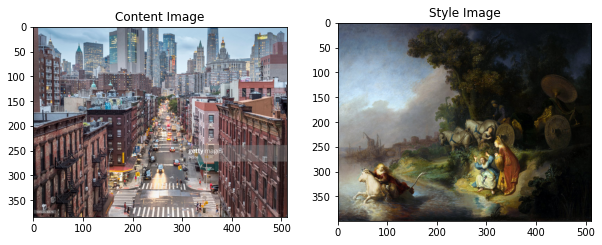

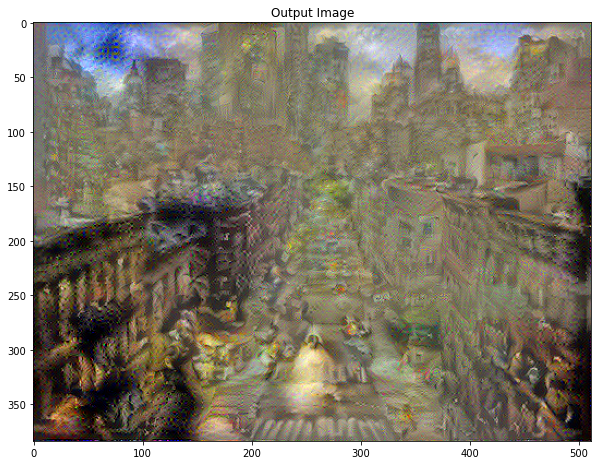

In [42]:
show_results(best, CONTENT_PATH, STYLE_PATH)

So, if Rembrandt had to paint New York as it looks today, the painting most likely would look very gloomy and depressing (as most Rembrandt works).

### 2.9.  Style Transfer with VGG19 for other pairs of images

It is interesting to see if and how VGG19 transfers style between another pair of content and style images. So, the second exercise is performed with a picture from the [Maldives](https://www.facebook.com/sleeepydreams/photos/a.200112560461855/1098952780577824/), which provides content, and [Claude Monet's "Landscape"](https://commons.wikimedia.org/wiki/File:Claude_Monet_-_Landscape,_The_Parc_Monceau.jpg), which is the styling source. Input images are visualized along with the generated one below.

In [43]:
CONTENT_PATH_1 = "/content/drive/MyDrive/DL Project/2_Maldives.jpg"
# C:/Users/aneta/OneDrive/Documents/07_Deep_learning/10_Project/pictures/2_Maldives.jpg
STYLE_PATH_1 = "/content/drive/MyDrive/DL Project/2_Claude_Monet_Landscape.jpg"
# C:/Users/aneta/OneDrive/Documents/07_Deep_learning/10_Project/pictures/2_Claude_Monet_Landscape.jpg

An attempt with unchanged function settings produced a not so nice image. Therefore, after several trial and errors, it turned out that reducing style weight from '1e-2' to '1e-4' (`content_weight` remained unchanged, equal to '1e3') produces better outputs.

This is in line with Gatys et al.[2] approach, who remind that the minimised loss function during image synthesis is a linear combination between the loss functions for content and style respectively. Therefore, the emphasis on either could be regulated for reconstructing content or the style. Thus, they found that a strong emphasis on style results in images that match the appearance of the artwork, effectively giving a texturised version of it. When placing strong emphasis on content, the photograph could be clearly identified, but the style of the painting is not as well-matched. Hence, for a specific pair of content and style images one can adjust the trade-off between content and style to create visually appealing images.

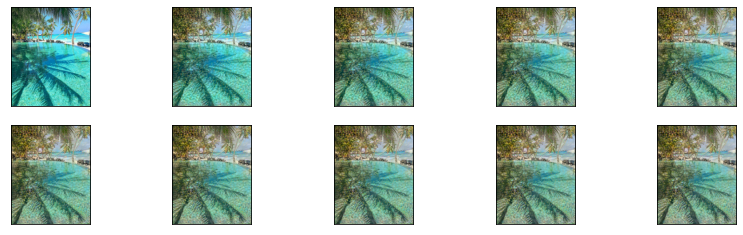

In [44]:
best_1, best_loss_1 = run_style_transfer(CONTENT_PATH_1, 
                                     STYLE_PATH_1, 
                                     content_weight = 1e3, 
                                     style_weight = 1e-4,
                                     num_iterations = 1000)

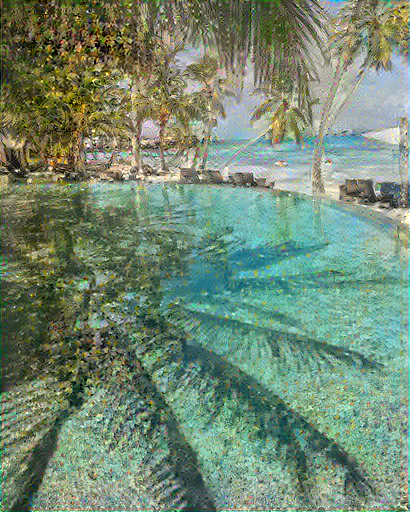

In [45]:
Image.fromarray(best_1)

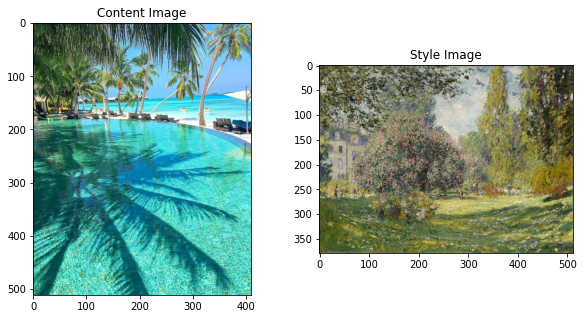

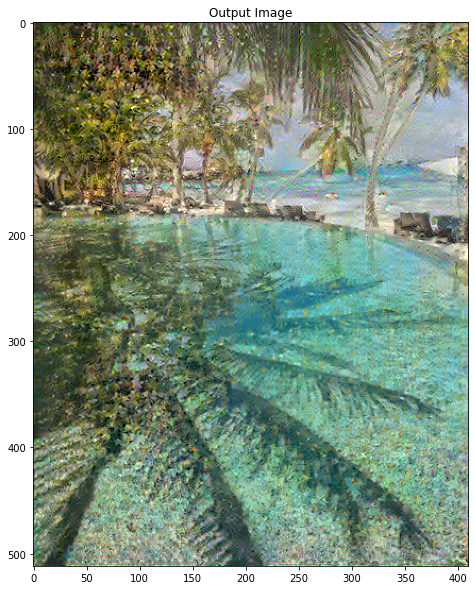

In [46]:
show_results(best_1, CONTENT_PATH_1, STYLE_PATH_1)

The new image (`best_1`) is quite appealing. Monet might have liked it as well.

One last try for Style Transfer with VGG19. This time content is taken from a picture showing [stars over the beach](https://fineartamerica.com/featured/stars-over-hunters-beach-bruce-neumann.html), and the style - from Vincent Van Gogh's famous ["The Stary Night"](https://www.britannica.com/topic/The-Starry-Night). Original images are displayed above the generated one. The ratio between content and style weights for computing total loss was adjusted again. Both content and style weights were slightly reduced.

In [47]:
CONTENT_PATH_2 = "/content/drive/MyDrive/DL Project/3_Stars_over_hunters_beach.jpg"
#C:/Users/aneta/OneDrive/Documents/07_Deep_learning/10_Project/pictures/3_Stars_over_hunters_beach.jpg
STYLE_PATH_2 = "/content/drive/MyDrive/DL Project/3_Starry_Night_van_Gogh.jpg"
# C:/Users/aneta/OneDrive/Documents/07_Deep_learning/10_Project/pictures/3_Starry_Night_van_Gogh.jpg

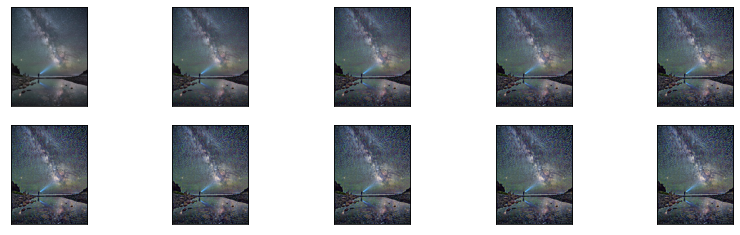

In [48]:
best_2, best_loss_2 = run_style_transfer(CONTENT_PATH_2, 
                                     STYLE_PATH_2, 
                                     content_weight = 1e2, 
                                     style_weight = 1e-6,
                                     num_iterations = 1000)

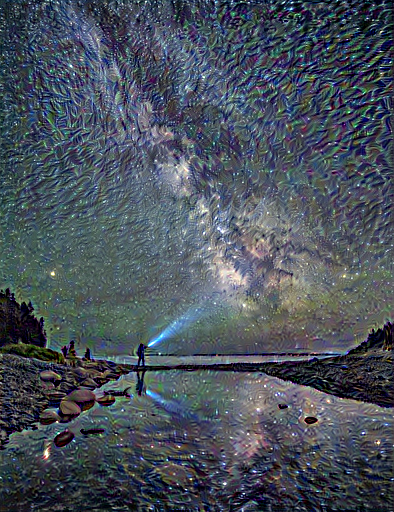

In [49]:
Image.fromarray(best_2)

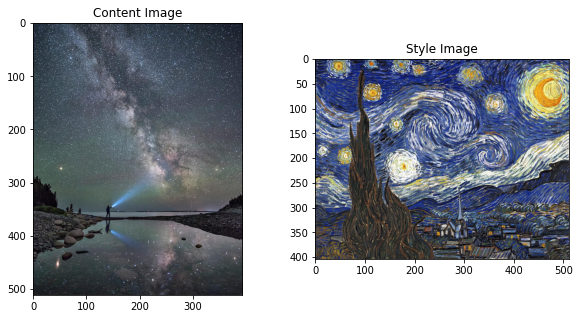

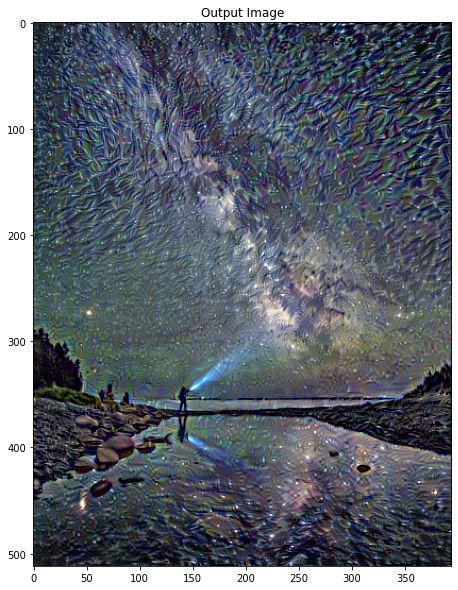

In [50]:
show_results(best_2, CONTENT_PATH_2, STYLE_PATH_2)

The synthesised image is not less mesmerizing than the original ones. Stars’ reflection in the see is still visible. 

Optimizer and its learning rate, as well as other hyper-parameters, also play important role for proper Style Transfer. If and how they interact is further explored with ResNet in a separate notebook (please, open **Chapter 3** to continue reading). Using one and the same function for different models (each with specific processing) results in collision, and this necessitates work in another file.

$$------------------------ \nabla ----- \nabla ----- \nabla ------------------------ $$